<a href="https://colab.research.google.com/github/egormarusev/graduate_work/blob/dev/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from tqdm import tqdm

In [ ]:
path = '/content/drive/MyDrive/diplom_data/'

In [ ]:
names_of_channels = ['bbcrussian', 'lentadnya', 'mash', 'mediazzzona', 'rbc_news', 'readovkanews', 'rian_ru', 'rt_russian', 'tass_agency', 'TJournal', 'truekpru', 'tvrain']

In [ ]:
subs = []
for name in names_of_channels:
  with open(path + 'data_parse/' + name + '.txt', 'r') as f:
    lines = f.readlines()
    date_arr = []
    subs_arr = []
    for i in range(len(lines)):
      if lines[i] == '            <div class="col-4 px-1 text-muted text-truncate">\n':
        date_arr.append(lines[i+1].split()[0])
        subs_arr.append(lines[i+3].split()[0])
  subs_df = pd.DataFrame({'date': date_arr, 'num_subs': subs_arr})
  subs_df['date']= pd.to_datetime(subs_df['date'], format='%d.%m.%y')
  subs.append(subs_df)

In [ ]:
# df_channels = []
# for i, name in enumerate(names_of_channels):
#   tmp = pd.read_json(path + 'data/' + name + '.json')
#   tmp.drop(['_', 'action', 'ttl_period', 'restriction_reason',
#          'grouped_id', 'post_author', 'entities', 'via_bot_id', 'from_id',
#          'noforwards', 'pinned', 'from_scheduled', 'legacy',
#          'media_unread', 'reply_markup', 'out'], axis=1, inplace=True)
#   tmp['channel name'] = name
#   tmp['only_date'] = tmp['date'].dt.date

#   first_subs_day = subs[i].loc[subs[i].index[-1], 'date'].date()
#   first_ind = tmp[tmp['only_date'] >= first_subs_day].index[-1]
#   tmp = tmp.loc[:first_ind].reset_index(drop=True)
#   tmp['only_date'] = pd.to_datetime(tmp['only_date']).dt.date
#   subs[i]['date'] = subs[i]['date'].dt.date
#   tmp = pd.merge(tmp, subs[i], left_on = 'only_date', right_on = 'date', how = 'left')
#   df_channels.append(tmp)

# df = pd.concat(df_channels)

In [ ]:
# subs[-1].tail()

,date,num_subs
2106,2017-05-13,13405
2107,2017-05-12,13372
2108,2017-05-11,13368
2109,2017-05-10,13332
2110,2017-05-09,13325


In [ ]:
# for i, name in enumerate(names_of_channels):
#   tmp = df[df['channel name'] == name]
#   subs[i]['date'] = subs[i]['date'].dt.date
#   sub = subs[i]
#   last_date = tmp.loc[tmp.index[0], 'only_date']
#   last_ind = sub[sub['date'] == last_date].index[0]
#   subs[i] = subs[i].loc[last_ind:].reset_index(drop=True)

In [ ]:
# df.to_csv('/content/drive/MyDrive/diplom_data/full_data.csv', index=False)
#df.to_json('/content/drive/MyDrive/diplom_data/DATA.json', orient='table')

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/diplom_data/DATA.csv')
# df['only_date']= pd.to_datetime(df['only_date'], format='%Y-%m-%d')

In [ ]:
# df['only_date'] = pd.to_datetime(df['only_date']).dt.date

In [ ]:
path = '/content/drive/MyDrive/diplom_data/'
df = pd.read_csv(path + 'full_data.csv')
df['only_date']= pd.to_datetime(df['only_date'], format='%Y-%m-%d').dt.date
df['date_x']= pd.to_datetime(df['date_x'], format='%Y-%m-%d')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.dropna(subset=['num_subs'], iplace)

In [ ]:
df.tail()

,id,peer_id,date_x,message,mentioned,silent,post,edit_hide,fwd_from,reply_to,...,views,forwards,replies,edit_date,reactions,channel name,only_date,date_y,num_subs,norm_subs
1003481,2276,"{'_': 'PeerChannel', 'channel_id': 1005031786}",2017-05-09 08:55:09+00:00,На Красной площади в Москве завершился парад П...,False,False,True,0.0,NaN,NaN,...,5729.0,1.0,NaN,NaN,NaN,tvrain,2017-05-09,2017-05-09,13325.0,0.429944
1003482,2275,"{'_': 'PeerChannel', 'channel_id': 1005031786}",2017-05-09 07:44:23+00:00,В параде впервые участвуют отряды «Юнармии» — ...,False,False,True,0.0,NaN,NaN,...,5414.0,0.0,NaN,NaN,NaN,tvrain,2017-05-09,2017-05-09,13325.0,0.406304
1003483,2274,"{'_': 'PeerChannel', 'channel_id': 1005031786}",2017-05-09 07:44:20+00:00,NaN,False,False,True,0.0,NaN,NaN,...,5391.0,0.0,NaN,NaN,NaN,tvrain,2017-05-09,2017-05-09,13325.0,0.404578
1003484,2272,"{'_': 'PeerChannel', 'channel_id': 1005031786}",2017-05-09 06:47:18+00:00,В 10:00 мы начинаем трансляцию парада Победы в...,False,False,True,0.0,NaN,NaN,...,5711.0,0.0,NaN,2017-05-09T06:53:13+00:00,NaN,tvrain,2017-05-09,2017-05-09,13325.0,0.428593
1003485,2271,"{'_': 'PeerChannel', 'channel_id': 1005031786}",2017-05-09 06:47:16+00:00,Фото: Александр Вильф / РИА Новости,False,False,True,0.0,NaN,NaN,...,5711.0,0.0,NaN,NaN,NaN,tvrain,2017-05-09,2017-05-09,13325.0,0.428593


In [ ]:
df['num_subs'].isna().sum()

0

In [ ]:
def norm_views(views, num_subs):
  return views / num_subs

In [ ]:
df['norm_subs'] = df.apply(lambda x: norm_views(x['views'], x['num_subs']), axis=1)

In [ ]:
df[df['norm_subs'] > 10]['channel name'].unique()

array(['mash', 'mediazzzona', 'rbc_news', 'readovkanews', 'rian_ru',
       'tass_agency', 'TJournal', 'truekpru', 'tvrain'], dtype=object)

In [ ]:
df.head()

,id,peer_id,date_x,message,mentioned,silent,post,edit_hide,fwd_from,reply_to,...,forwards,replies,edit_date,reactions,channel name,only_date,date_y,num_subs,norm_subs,log_views
0,41356,"{'_': 'PeerChannel', 'channel_id': 1003921752}",2023-02-04 17:44:01+00:00,Украина приняла на вооружение цифровую систему...,False,False,True,0.0,NaN,NaN,...,22.0,NaN,NaN,NaN,bbcrussian,2023-02-04,2023-02-04,397822.0,0.015974,0.015848
1,41355,"{'_': 'PeerChannel', 'channel_id': 1003921752}",2023-02-04 17:30:08+00:00,Daily Telegraph: британские власти планируют о...,False,False,True,0.0,NaN,NaN,...,22.0,NaN,NaN,NaN,bbcrussian,2023-02-04,2023-02-04,397822.0,0.034626,0.034040
2,41354,"{'_': 'PeerChannel', 'channel_id': 1003921752}",2023-02-04 16:33:01+00:00,Село Красное в Белгородской области попало под...,False,False,True,0.0,NaN,NaN,...,10.0,NaN,NaN,NaN,bbcrussian,2023-02-04,2023-02-04,397822.0,0.076954,0.074137
3,41353,"{'_': 'PeerChannel', 'channel_id': 1003921752}",2023-02-04 16:18:25+00:00,Главное к этому часу. Идет 346-й день войны\n\...,False,False,True,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,bbcrussian,2023-02-04,2023-02-04,397822.0,0.085893,0.082402
4,41351,"{'_': 'PeerChannel', 'channel_id': 1003921752}",2023-02-04 15:32:52+00:00,Глава офиса президента Украины Андрей Ермак со...,False,False,True,0.0,NaN,NaN,...,12.0,NaN,NaN,NaN,bbcrussian,2023-02-04,2023-02-04,397822.0,0.108219,0.102754


In [ ]:
df[df['message'].isna()]  

,id,peer_id,date_x,message,mentioned,silent,post,edit_hide,fwd_from,reply_to,...,forwards,replies,edit_date,reactions,channel name,only_date,date_y,num_subs,norm_subs,log_views
109,41243,"{'_': 'PeerChannel', 'channel_id': 1003921752}",2023-02-02 11:01:20+00:00,NaN,False,False,True,0.0,NaN,NaN,...,202.0,NaN,NaN,NaN,bbcrussian,2023-02-02,2023-02-02,395043.0,0.200684,0.182892
110,41242,"{'_': 'PeerChannel', 'channel_id': 1003921752}",2023-02-02 11:01:20+00:00,NaN,False,False,True,0.0,NaN,NaN,...,191.0,NaN,NaN,NaN,bbcrussian,2023-02-02,2023-02-02,395043.0,0.198857,0.181368
111,41241,"{'_': 'PeerChannel', 'channel_id': 1003921752}",2023-02-02 11:01:19+00:00,NaN,False,False,True,0.0,NaN,NaN,...,192.0,NaN,NaN,NaN,bbcrussian,2023-02-02,2023-02-02,395043.0,0.198852,0.181364
112,41240,"{'_': 'PeerChannel', 'channel_id': 1003921752}",2023-02-02 11:01:19+00:00,NaN,False,False,True,0.0,NaN,NaN,...,194.0,NaN,NaN,NaN,bbcrussian,2023-02-02,2023-02-02,395043.0,0.196665,0.179538
113,41239,"{'_': 'PeerChannel', 'channel_id': 1003921752}",2023-02-02 11:01:19+00:00,NaN,False,False,True,0.0,NaN,NaN,...,193.0,NaN,NaN,NaN,bbcrussian,2023-02-02,2023-02-02,395043.0,0.196614,0.179496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003275,2509,"{'_': 'PeerChannel', 'channel_id': 1005031786}",2017-05-25 17:02:14+00:00,NaN,False,False,True,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,tvrain,2017-05-25,2017-05-25,13793.0,0.415211,0.347278
1003467,2293,"{'_': 'PeerChannel', 'channel_id': 1005031786}",2017-05-10 13:02:11+00:00,NaN,False,False,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,tvrain,2017-05-10,2017-05-10,13332.0,NaN,NaN
1003475,2283,"{'_': 'PeerChannel', 'channel_id': 1005031786}",2017-05-09 13:54:28+00:00,NaN,False,False,True,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,tvrain,2017-05-09,2017-05-09,13325.0,0.430169,0.357793
1003477,2280,"{'_': 'PeerChannel', 'channel_id': 1005031786}",2017-05-09 12:46:46+00:00,NaN,False,False,True,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,tvrain,2017-05-09,2017-05-09,13325.0,0.429193,0.357110


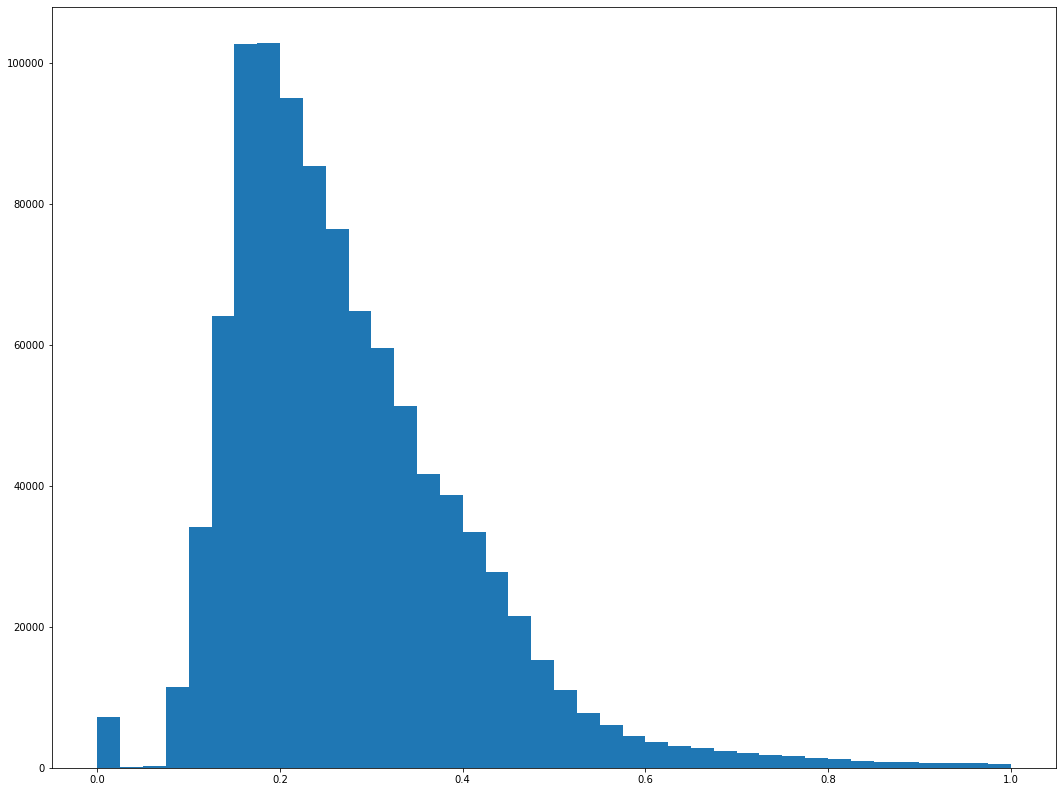

In [ ]:
tmp = df[df['norm_subs'] <= 1]
fig = plt.subplots(figsize=(18,14))
plt.hist(tmp['norm_subs'], bins=40)
plt.show()

In [ ]:
import seaborn as sns

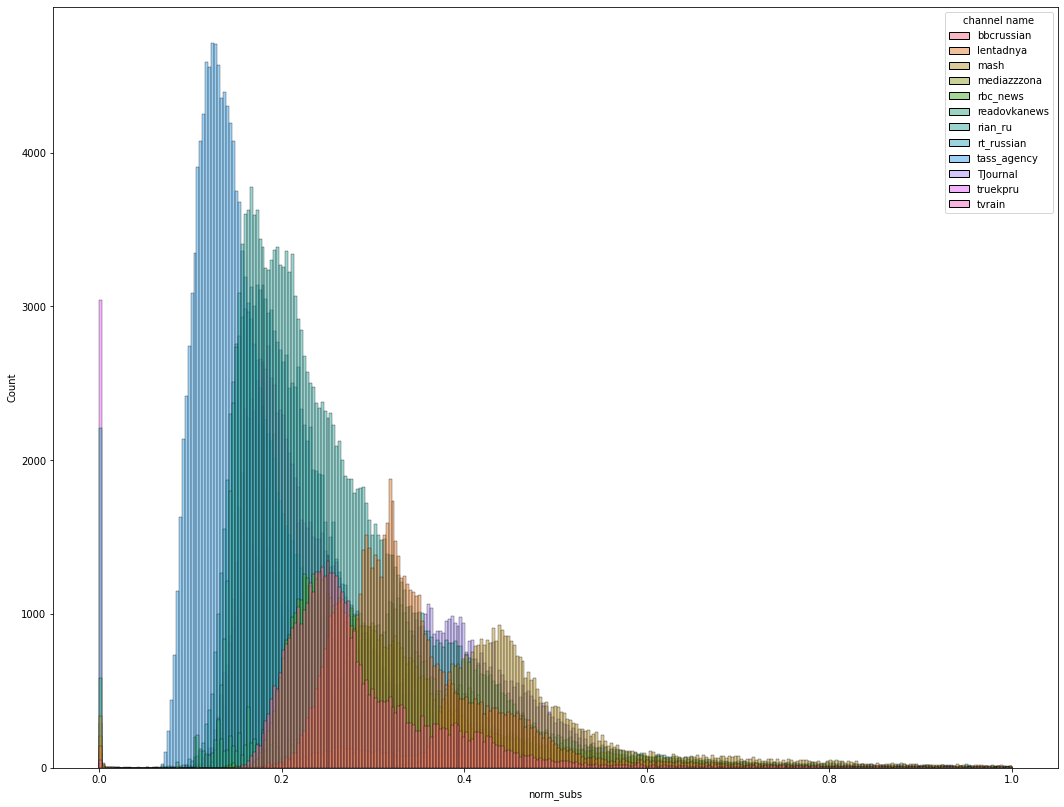

In [ ]:
fig = plt.subplots(figsize=(18,14))
sns.histplot(tmp, x="norm_subs", hue="channel name")
plt.show()

In [ ]:
df['log_views'] = np.log(arr)

In [ ]:
arr = np.array(df['norm_subs'].values) + 1

In [ ]:
df['log_views'].min()

5.365468915273348e-06

In [ ]:
sns.factorplot(x='Program', y='Value', data=df)

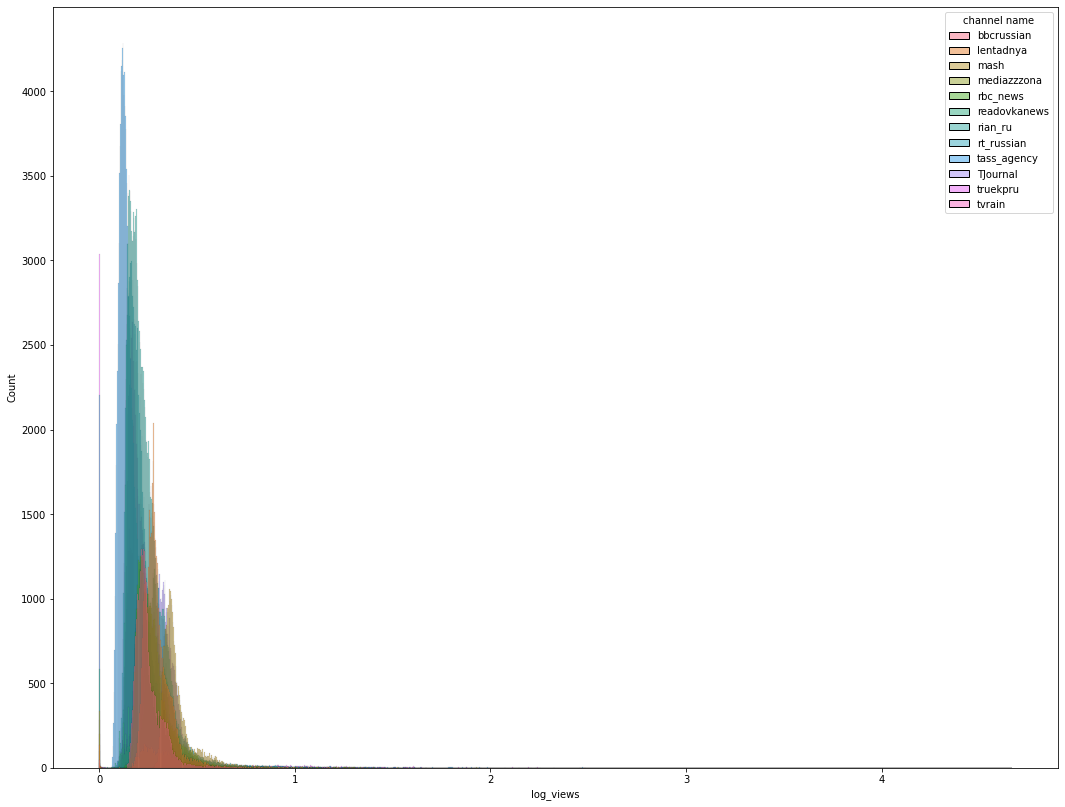

In [ ]:
fig = plt.subplots(figsize=(18,14))
sns.histplot(df, x="log_views", hue="channel name")
plt.show()